In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


# Bagian Baru

In [2]:
#ekstrak zip
import os
import zipfile

local_zip = '/content/drive/MyDrive/BreastCancerOriginal.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
base_dataset = "/content/BreastCancerOriginal"
cancer_dir = os.listdir(base_dataset)

In [5]:
#memastikan gambar png
for class_item in cancer_dir:
  cur_dir = base_dataset+"/"+class_item
  for dir in os.listdir(cur_dir):
    items_dir = cur_dir+"/"+dir
    for item in os.listdir(items_dir):
      if not item.endswith(".png"):
          os.remove(os.path.join(cur_dir, item))
    

In [6]:
BreastCancerImage = 'BreastCancerImage'
image_non_idc_dir = '/content/BreastCancerImage/non_idc'
image_idc_dir = '/content/BreastCancerImage/idc'

os.mkdir (BreastCancerImage)
os.mkdir (image_non_idc_dir)
os.mkdir (image_idc_dir)

In [7]:
import shutil

#jadikan 1
for patient in cancer_dir:   
    path_0 = base_dataset +'/'+str(patient) + '/0'
    path_1 = base_dataset +'/'+str(patient) + '/1'
    file_list_0 = os.listdir(path_0)   
    file_list_1 = os.listdir(path_1)
    for fname in file_list_0:
            src = os.path.join(path_0, fname)
            dst = os.path.join(image_non_idc_dir, fname)
            shutil.copyfile(src, dst)
    for fname in file_list_1: 
        src = os.path.join(path_1, fname)
        dst = os.path.join(image_idc_dir, fname)
        shutil.copyfile(src, dst)

In [8]:
print (len(os.listdir('/content/BreastCancerImage/idc')))
print (len(os.listdir('/content/BreastCancerImage/non_idc')))

78786
198738


In [9]:
!pip install split-folders

In [10]:
import splitfolders
splitfolders.fixed("/content/BreastCancerImage", output="SplitWithFixed", seed=42, fixed=(10), oversample=False, group_prefix=None)

Copying files: 277524 files [00:57, 4814.94 files/s]


In [11]:
print ("train idc :" ,len(os.listdir('/content/SplitWithFixed/train/idc')))
print ("train non idc :" ,len(os.listdir('/content/SplitWithFixed/train/non_idc')))
print ("Val idc :" ,len(os.listdir('/content/SplitWithFixed/val/idc')))
print ("Val non idc :" ,len(os.listdir('/content/SplitWithFixed/val/non_idc')))

train idc : 78776
train non idc : 198728
Val idc : 10
Val non idc : 10


In [12]:
splitfolders.ratio("/content/BreastCancerImage", output='SplitWithRatio', seed=42, ratio=(0.8, 0.2),group_prefix=None)

Copying files: 277524 files [01:49, 2541.37 files/s]


In [13]:
print ("train idc :" ,len(os.listdir('/content/SplitWithRatio/train/idc')))
print ("train non idc :" ,len(os.listdir('/content/SplitWithRatio/train/non_idc')))
print ("Val idc :" ,len(os.listdir('/content/SplitWithRatio/val/idc')))
print ("Val non idc :" ,len(os.listdir('/content/SplitWithRatio/val/non_idc')))

train idc : 63028
train non idc : 158990
Val idc : 15758
Val non idc : 39748


In [14]:
train_ratio_idc_dir = '/content/SplitWithRatio/train/idc'
train_ratio_non_idc_dir = '/content/SplitWithRatio/train/non_idc'
val_ratio_idc_dir = '/content/SplitWithRatio/val/idc'
val_ratio_non_idc_dir = '/content/SplitWithRatio/val/non_idc'

train_ratio_idc = os.listdir(train_ratio_idc_dir)
train_ratio_non_idc = os.listdir(train_ratio_non_idc_dir)
val_ratio_idc = os.listdir(val_ratio_idc_dir)
val_ratio_non_idc = os.listdir(val_ratio_non_idc_dir)

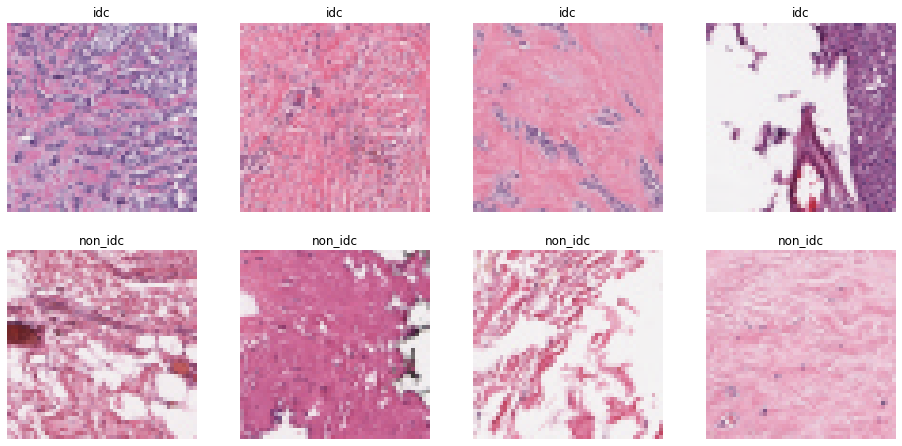

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index +=4
next_idc_ratio = [os.path.join(train_ratio_idc_dir, fname) 
                for fname in os.listdir(train_ratio_idc_dir)[pic_index-4:pic_index]]
next_non_idc_ratio = [os.path.join(train_ratio_non_idc_dir, fname) 
                for fname in os.listdir(train_ratio_non_idc_dir)[pic_index-4:pic_index]]


for i, img_path in enumerate(next_idc_ratio+next_non_idc_ratio):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.title(img_path.split(os.path.sep)[-2])
  plt.imshow(img)

plt.show()


# Preprocessing

In [16]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk('/content/SplitWithRatio/train'):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (25,25))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [19]:
# Gather data val
val_data = []
val_label = []
for r, d, f in os.walk('/content/SplitWithRatio/val'):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (25,25))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [21]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_test = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [169 120 182]
Data setelah di-normalisasi  [0.6627451  0.47058824 0.7137255 ]


In [23]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[381:391])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[381:391])

Label sebelum di-encoder  ['idc' 'idc' 'idc' 'idc' 'idc' 'idc' 'idc' 'idc' 'idc' 'idc']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0]
